# IMPORTING OPENCV,NUMPY,MATPLOTLIB LIBRARIES

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LOADING YOLO WEIGHTS AND CONFIGURATION FILES

In [2]:
# Load Yolo
net = cv2.dnn.readNet("../Cervical_cancer_yolo/yolov3_training_final.weights", "../Cervical_cancer_yolo/yolov3_testing.cfg")


# LOADING CLASSES

In [3]:
#CLASSES
with open("../Cervical_cancer_yolo/classes.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
print(classes)

['cervix', 'cervix_roi', 'red_patch', 'white_patch']


# LOADING INPUT IMAGE

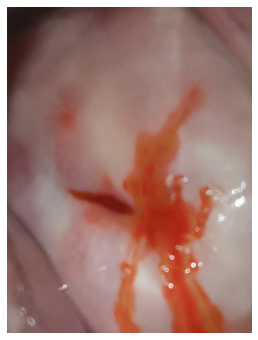

In [4]:
# Loading image
img = cv2.imread("../Cervical_cancer_yolo/images/1 ST high ac CERVICITIS T3 S3.jpg")
#104 ST low ac T1 S6
img = cv2.resize(img, None, fx=0.2, fy=0.2)
height, width, channels = img.shape
#104 ST low ac T1 S6
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# DETECTING OBJECTS ON IMAGE

In [5]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
for b in blob:
    for n, img_blob in enumerate(b):
        cv2.imshow(str(n), img_blob)
net.setInput(blob)
outs = net.forward(output_layers)

# SHOWING INFORMATION ON THE SCREEN

In [6]:
class_ids = []
confidences = []
boxes = []
for out in outs:
     for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
                        # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
                         # Rectangle coordinates

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            #RICounts=len(boxes)
print(len(boxes))           

18


In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
number_objects_detected = len(boxes)
font = cv2.FONT_HERSHEY_PLAIN
            #lablesList=[]

                 

# PRINTING LABEL NAMES

In [8]:
for i in range(len(boxes)):
    if i in indexes.flatten() :                       
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x,y+50), cv2.FONT_HERSHEY_COMPLEX, 0.4, (250,250,250))
        print(label)

cervix_roi
cervix
red_patch
red_patch
red_patch
red_patch
red_patch
red_patch
white_patch


# PLOTTING OUTPUT BY USING MATPLOTLIB


In [9]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# SAVING OUTPUT IN E DRIVE

In [10]:
cv2.imshow("Image", img)
cv2.imwrite('E:/1 ST high ac CERVICITIS T3 S3.jpg', img)
cv2.destroyAllWindows()

# DISPLAY OUTPUT LIKE POPUP

In [ ]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# ALL

In [ ]:
# cv2.imshow("Image", img)
# #cv2.waitKey(0)
# #cv2.imwrite('E:/1 ST high ac CERVICITIS T3 S3.jpg', img)
# #cv2.destroyAllWindows()
# plt.figure(figsize=(20,20))
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()